In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
nS = 101

In [69]:
def value_iter(prob=0.5, theta=0.0001, discount_factor=1.0):
    reward = np.zeros(nS)
    reward[100] = 1
    v = np.zeros(nS)
    while(1):
        delta = 0
        for s in range(1, nS - 1):
            new_vals = -1e9
            for a in range(1, min(s, 100 - s) + 1):
                cur_vals = prob * (reward[s + a] + discount_factor * v[s + a])
                cur_vals += (1 - prob) * (reward[s - a] + discount_factor * v[s - a])
                new_vals = max(new_vals, cur_vals)
            delta = max(delta, abs(new_vals - v[s]))
            v[s] = new_vals
        if(delta < theta):
            break
    
    # Generate policy for the obtained approx value func
    policy = np.zeros(nS)
    for s in range(1, nS - 1):
        best_action = -1
        best_value = 0
        for a in range(1, min(s, 100 - s) + 1):
            cur_vals = prob * (reward[s + a] + discount_factor * v[s + a])
            cur_vals += (1 - prob) * (reward[s - a] + discount_factor * v[s - a])
            if(cur_vals > best_value):
                best_value = cur_vals
                best_action = a
        policy[s] = best_action
    return policy, v

In [70]:
policy, v = value_iter(0.4)
print(policy, v)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 15.  9. 17.
  7. 19. 20. 21. 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 39. 40.  9.  8. 43. 44. 45.  4. 47.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8. 41. 10. 11. 12. 13. 14. 15. 34.  8. 18. 19. 20.  4.
 22.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.] [0.         0.00203162 0.00515507 0.00922512 0.01290418 0.01738208
 0.02306279 0.02781403 0.03227457 0.03767825 0.04346082 0.05035153
 0.05765757 0.06521897 0.06953507 0.07442925 0.08068842 0.08660695
 0.09421092 0.10313138 0.10865755 0.11596417 0.12587883 0.1335785
 0.1441471  0.16       0.16309304 0.16774251 0.17383767 0.17936474
 0.18607649 0.19459454 0.20172104 0.20841305 0.21652655 0.22519453
 0.2355273  0.24648826 0.25785582 0.2643026  0.27164589 0.28103263
 0.28991593 0.30131638 0.31471349 0.32298754 0.33394956 0.3488281
 0.36036974 0.37622184 0.4        0.40309304 0.40774251

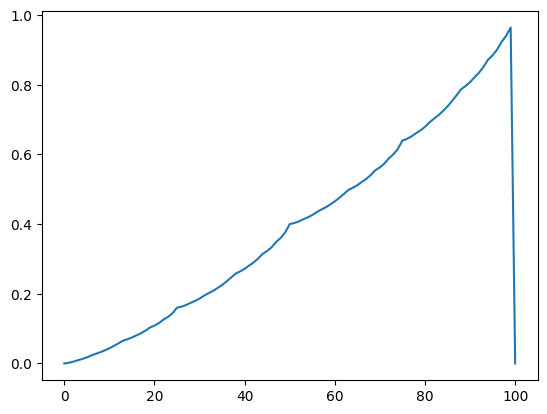

In [71]:
x = np.arange(101)
y = v

plt.plot(x, y)
plt.show()

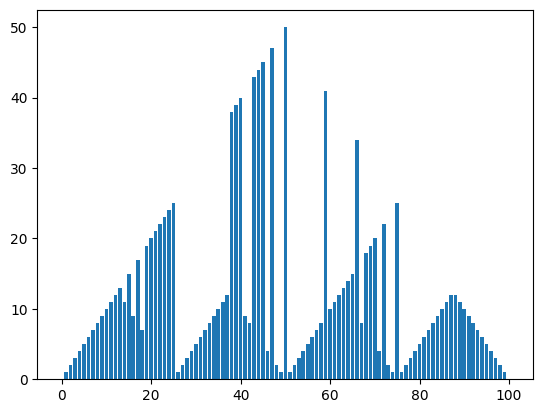

In [72]:
x = np.arange(101)
y = policy

plt.bar(x, y, align='center')
plt.show()